author: Songyang Cheng

date: 1007

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Relationship Across Time betwee Traffic Light Cycle and Pedestrain Volume 

In [2]:
programs = pd.read_excel('te_cycle_data.xlsx', sheet_name='Programs')
patterns = pd.read_excel('te_cycle_data.xlsx', sheet_name='Patterns')

In [3]:
programs['Pattern'] = programs['Pattern'].replace('Flash', 0)
programs['Pattern'].astype('int64')
programs['Pattern'].head()

0    0
1    6
2    3
3    1
4    5
Name: Pattern, dtype: int64

In [4]:
combined = pd.merge(programs, patterns, on=['Intersection', 'Pattern'], how="left")
combined

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
2,State and Dayton,Monday - Thursday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
3,State and Dayton,Monday - Thursday,09:10:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
4,State and Dayton,Monday - Thursday,15:30:00,5,Dayton/Fairchild,State,21.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
5,State and Dayton,Monday - Thursday,18:00:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
6,State and Dayton,Monday - Thursday,19:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
7,State and Dayton,Friday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,State and Dayton,Friday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
9,State and Dayton,Friday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5


In [5]:
Dayton = combined[combined['Intersection'] == 'State and Dayton']
Gorham = combined[combined['Intersection'] == 'State and Gorham']
Johnson = combined[combined['Intersection'] == 'State and Johnson']
Dayton.head()

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
2,State and Dayton,Monday - Thursday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
3,State and Dayton,Monday - Thursday,09:10:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
4,State and Dayton,Monday - Thursday,15:30:00,5,Dayton/Fairchild,State,21.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5


In [6]:
Dayton_weekday = Dayton[Dayton['Day Type'] == 'Monday - Thursday']
Dayton_fri = Dayton[Dayton['Day Type'] == 'Friday']
Dayton_sat = Dayton[Dayton['Day Type'] == 'Saturday']
Dayton_sun = Dayton[Dayton['Day Type'] == 'Sunday']
Dayton_weekday.head()

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
2,State and Dayton,Monday - Thursday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
3,State and Dayton,Monday - Thursday,09:10:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
4,State and Dayton,Monday - Thursday,15:30:00,5,Dayton/Fairchild,State,21.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5


In [7]:
import datetime as dt
import matplotlib.dates as mdates

In [8]:
# credit to daronjp@stackoverflow 
# https://stackoverflow.com/questions/58070901/bar-plot-with-24-hours-in-the-x-axis-with-date-time-data-of-only-the-beginning-o

In [42]:
# If the number of seconds elapsed is divisible by 1800 (30 minutes), that number will be used as one of the ticks.
# xticks = [x for x in range(60 * 60 * 24 + 30) if x % 1800 == 0]
xticks = [x for x in range(60 * 60 * 24 + 30) if x % 3600 == 0]
xticklabels = [str(dt.timedelta(seconds=x)) for x in xticks]

In [10]:
modify_Dayton_starttime = Dayton_weekday['Start Time'].copy() # deep copy 
modify_Dayton_starttime[7] =  dt.time(23,59,59)
modify_Dayton_starttime

0    00:30:00
1    06:00:00
2    07:00:00
3    09:10:00
4    15:30:00
5    18:00:00
6    19:00:00
7    23:59:59
Name: Start Time, dtype: object

In [11]:
# Rather than plotting the dt.time() on the x-axis, it could be easier to plot the number of seconds that have elapsed in the day. 
# Below we use a list comprehension to convert the times into the number of seconds elapsed.
seconds = [(x.hour * 3600 + x.minute * 60 + x.second) for x in modify_Dayton_starttime]

In [12]:
modify_Dayton_green_main = pd.concat([pd.Series([30.5]), Dayton_weekday['Main Street Green (s)']])
modify_Dayton_green_main

0    30.5
0     NaN
1    30.5
2    45.5
3    30.5
4    45.5
5    30.5
6    30.5
dtype: float64

In [13]:
modify_Dayton_green_cross = pd.concat([pd.Series([25.5]), Dayton_weekday['Cross Street Green (s)']])
modify_Dayton_green_cross

0    25.5
0     NaN
1    25.5
2    25.5
3    25.5
4    25.5
5    25.5
6    25.5
dtype: float64

In [14]:
pedestrian = pd.read_csv("Upper_State_St._Pedestrian_Counts.csv")
names = pedestrian.Time.str.split(' ',expand=True)
names.columns = ['date', 'time']
pedestrian = pedestrian.join(names)
pedestrian.drop(['Time'],axis=1, inplace=True)

In [15]:
pedestrian["date"] = pd.to_datetime(pedestrian["date"])
pedestrian["day_of_week"] = pedestrian["date"].dt.weekday_name
pedestrian["day_of_week"].value_counts()

Friday       1272
Monday       1272
Sunday       1248
Wednesday    1248
Tuesday      1248
Thursday     1247
Saturday     1224
Name: day_of_week, dtype: int64

In [16]:
pedestrian.head()

,SS_22_State_St__North_Side,SS_23_State_St__South_Side,F200_State_St____Goodman_s,F200_State_St____Art_Center,F341_State_St_,F344_State_St_,ObjectId,date,time,day_of_week
0,80,113,82,115,115.0,76.0,1,2018-08-20,08:00:00,Monday
1,446,350,445,0,517.0,502.0,2,2018-08-24,12:00:00,Friday
2,129,108,117,111,105.0,122.0,3,2018-08-20,09:00:00,Monday
3,391,248,370,0,450.0,481.0,4,2018-08-24,13:00:00,Friday
4,335,212,281,0,337.0,416.0,5,2018-08-24,14:00:00,Friday


In [17]:
ped_wkd = pedestrian[(pedestrian['day_of_week'] == 'Monday')|
                     (pedestrian['day_of_week'] == 'Tuesday')|
                     (pedestrian['day_of_week'] == 'Wednesday')|
                     (pedestrian['day_of_week'] == 'Thursday') ]
st_22_wkd = ped_wkd.groupby(ped_wkd.time)["SS_22_State_St__North_Side"].mean()
st_22_wkd.head()

time
00:00:00    68.081340
01:00:00    53.626794
02:00:00    36.264423
03:00:00     7.354067
04:00:00     3.468900
Name: SS_22_State_St__North_Side, dtype: float64

In [18]:
st_23_wkd = ped_wkd.groupby(ped_wkd.time)["SS_23_State_St__South_Side"].mean()
st_23_wkd.head()

time
00:00:00    45.272727
01:00:00    27.593301
02:00:00    14.730769
03:00:00     4.157895
04:00:00     3.751196
Name: SS_23_State_St__South_Side, dtype: float64

In [19]:
dayton_wkd_total = st_22_wkd + st_23_wkd
dayton_wkd_total

time
00:00:00    113.354067
01:00:00     81.220096
02:00:00     50.995192
03:00:00     11.511962
04:00:00      7.220096
05:00:00     13.732057
06:00:00     48.162679
07:00:00    117.660287
08:00:00    160.468900
09:00:00    185.516746
10:00:00    260.090909
11:00:00    434.665072
12:00:00    634.894737
13:00:00    521.746411
14:00:00    449.009569
15:00:00    417.229665
16:00:00    456.502392
17:00:00    516.866029
18:00:00    538.229665
19:00:00    518.157895
20:00:00    422.306220
21:00:00    343.913876
22:00:00    256.846890
23:00:00    172.909091
dtype: float64

In [20]:
# credit to ImportanceOfBeingErnest@overstackflow
# https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot

In [21]:
def annot_max(x,y, ax=None):
    maxIxVal = np.argmax(y);
    zeroBasedIx = np.argwhere(y.index==maxIxVal).flatten()[0];
    xmax = x[zeroBasedIx];
    ymax = y.max()
    text = "x={:s}, count={:.2f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="arc3,rad=0.1")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.98,0.99), **kw)

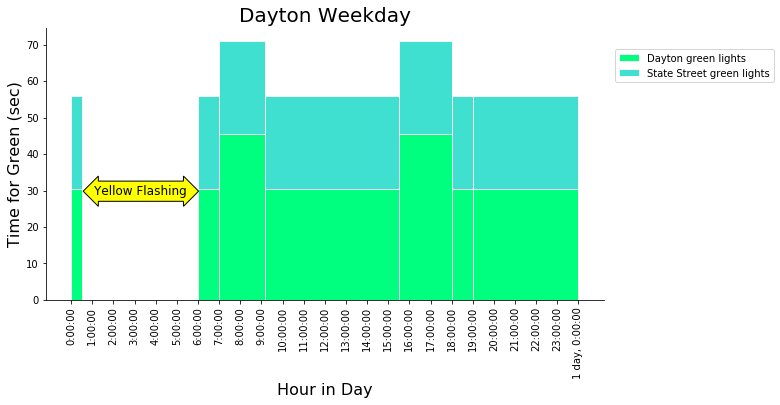

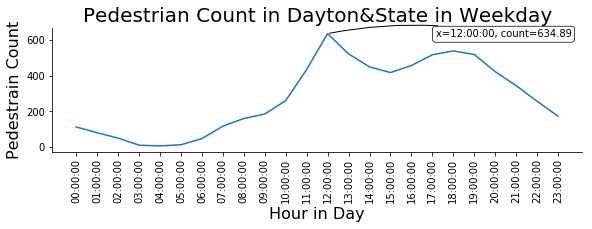

In [62]:
# # plt.rcParams['figure.figsize'] = (30.0, 20.0)
# # plt.subplots_adjust(wspace=0.3, hspace=0.5)  # adjust plots intervals

# fig, ax = plt.subplots(figsize=(10,5))
# # ax = ax_list[0]

# bar_start = 0
# for ix, (second, main_green, cross_green) in enumerate(zip(seconds, modify_Dayton_green_main, modify_Dayton_green_cross)):
#     width = second - bar_start
#     ax.bar(bar_start, main_green, width=width, align='edge', color='springgreen', edgecolor='whitesmoke', 
#            label="Dayton green lights" if ix == 0 else "_nolegend_")
#     ax.bar(bar_start, cross_green, width=width, bottom=main_green, 
#            align='edge', color = 'turquoise', edgecolor='whitesmoke', label="State Street green lights" if ix == 0 else "_nolegend_")
#     bar_start += width

# bbox_props = dict(boxstyle="darrow,pad=0.3",lw=1, facecolor="yellow", ec="black")
# txt = ax.text(0.17, 0.4, "Yellow Flashing", ha="center", va="center", rotation=0,
#             size=12, bbox=bbox_props, transform = ax.transAxes)

# ax.set_xticks(xticks)
# ax.set_xticklabels(xticklabels, rotation=90)
# ax.set_title("Dayton Weekday", fontsize=20)
# ax.set_xlabel("Hour in Day", fontsize=16)
# ax.set_ylabel("Time for Green (sec)", fontsize=16)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.legend(loc=[1.02, 0.8])
# plt.show()

# fig2 = plt.figure(figsize=(9.5, 5))
# ax2 = fig2.add_subplot(211)
# # ax2 = ax_list[1]
# ax2.plot(dayton_wkd_total.index, dayton_wkd_total.values)
# ax2.set_title("Pedestrian Count in Dayton&State in Weekday", fontsize=20)
# ax2.set_xticklabels(dayton_wkd_total.index, rotation=90)
# ax2.set_xlabel("Hour in Day", fontsize=16)
# ax2.set_ylabel("Pedestrain Count", fontsize=16)
# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)
# annot_max(dayton_wkd_total.index,dayton_wkd_total,ax2)

In [78]:
def lights_ped(timeline, main_gree, cross_green, title1, ped_count, title2, 
              street1_lab="Main Street green lights", street2_lab="State Street green lights", 
               arw_x=0.17, arw_y=0.14, flash=True):
    fig, ax = plt.subplots(figsize=(10,5))

    bar_start = 0
    for ix, (second, main_green, cross_green) in enumerate(zip(timeline, main_gree, cross_green)):
        width = second - bar_start
        ax.bar(bar_start, main_green, width=width, align='edge', color='springgreen', edgecolor='whitesmoke', 
               label=street1_lab if ix == 0 else "_nolegend_")
        ax.bar(bar_start, cross_green, width=width, bottom=main_green, 
               align='edge', color = 'turquoise', edgecolor='whitesmoke', label=street2_lab if ix == 0 else "_nolegend_")
        bar_start += width

    if flash:
        bbox_props = dict(boxstyle="darrow,pad=0.3",lw=2, facecolor="yellow", ec="black")
        txt = ax.text(arw_x, arw_y, "Yellow Flashing", ha="center", va="center", rotation=0,
            size=12, bbox=bbox_props, transform = ax.transAxes)

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=90)
    ax.set_title(title1, fontsize=20)
    ax.set_xlabel("Hour in Day", fontsize=16)
    ax.set_ylabel("Time for Green (sec)", fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend(loc=[1.02, 0.8])
    plt.show()

    fig2 = plt.figure(figsize=(9.5, 5))
    ax2 = fig2.add_subplot(211)
    lines = ax2.plot(ped_count.index, ped_count.values)
    ax2.set_title(title2, fontsize=20)
    ax2.set_xticklabels(ped_count.index, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=16)
    ax2.set_ylabel("Pedestrain Count", fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    annot_max(ped_count.index, ped_count,ax2)

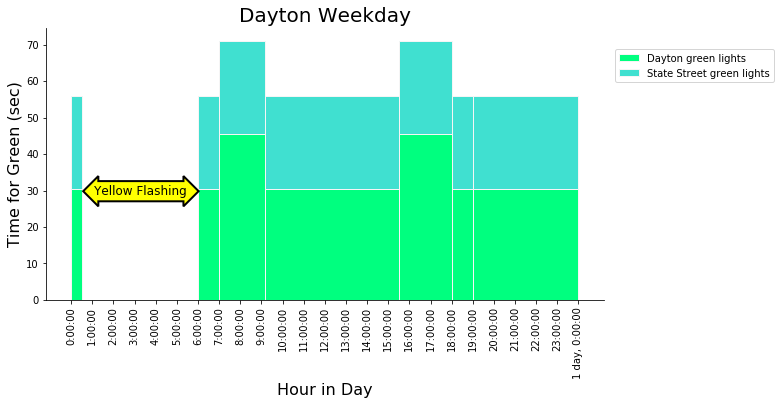

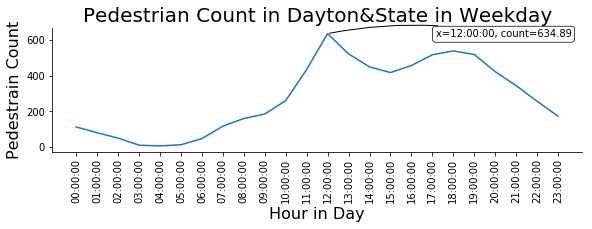

In [79]:
lights_ped(seconds, modify_Dayton_green_main, modify_Dayton_green_cross, "Dayton Weekday",
           dayton_wkd_total, "Pedestrian Count in Dayton&State in Weekday", 
          "Dayton green lights", "State Street green lights", 0.17, 0.4)

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
def preprocess_ped_lights(ped_, street1, street2, lights_):
    # calculate all pedestrian in the specific street area group by time
    s1 = ped_.groupby(ped_.time)[street1].mean()
    s2 = ped_.groupby(ped_.time)[street2].mean()
    ped_total = s1 + s2
    
    # preprocess time 
    modify = lights_['Start Time'].copy()
    modify.reset_index(inplace=True, drop=True)
    modify[len(modify)] =  dt.time(23,59,59)
    
    
    seconds = [(x.hour * 3600 + x.minute * 60 + x.second) for x in modify]
    main = pd.concat([pd.Series([lights_['Main Street Green (s)'].iloc[-1]]), lights_['Main Street Green (s)']])
    cross = pd.concat([pd.Series([lights_['Cross Street Green (s)'].iloc[-1]]), lights_['Cross Street Green (s)']])
    
    return ped_total, seconds, main, cross

In [68]:
ped_fri = pedestrian[pedestrian['day_of_week'] == 'Friday']

dayton_fri_total, dayton_fri_seconds, modify_Dayton_green_main_fri, modify_Dayton_green_cross_fri = \
    preprocess_ped_lights(ped_fri, "SS_22_State_St__North_Side", "SS_23_State_St__South_Side", Dayton_fri)

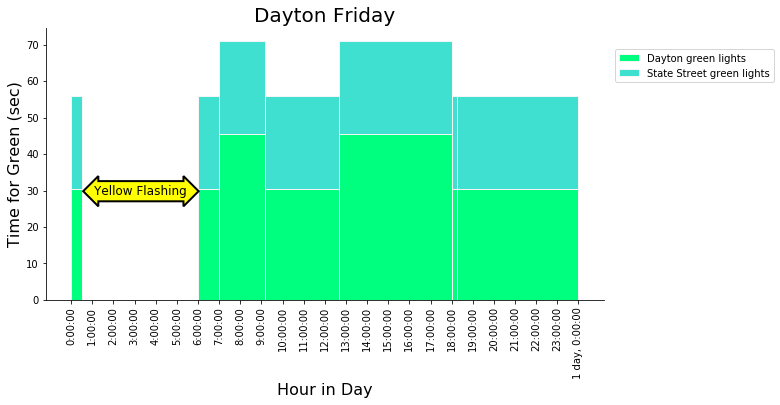

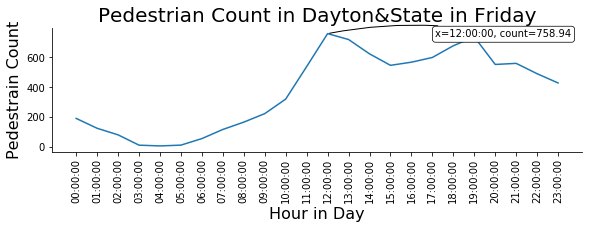

In [80]:
lights_ped(dayton_fri_seconds, modify_Dayton_green_main_fri, modify_Dayton_green_cross_fri, "Dayton Friday",
           dayton_fri_total, "Pedestrian Count in Dayton&State in Friday", 
          "Dayton green lights", "State Street green lights", 0.17, 0.4)

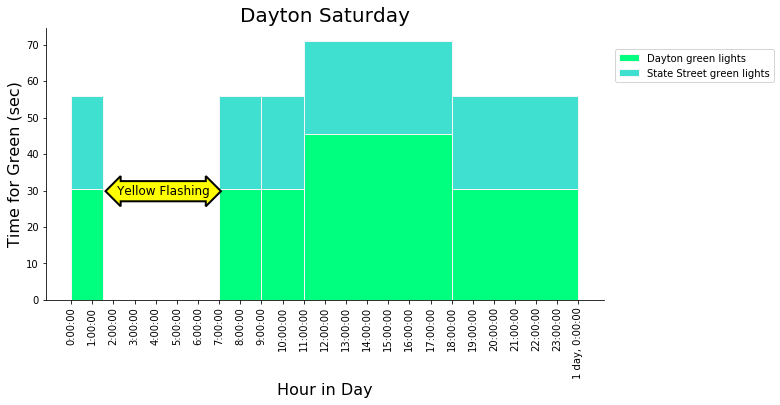

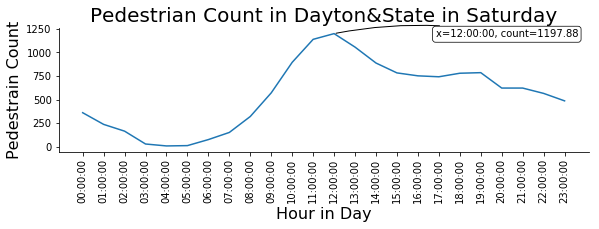

In [81]:
ped_sat = pedestrian[pedestrian['day_of_week'] == 'Saturday']

dayton_sat_total, dayton_sat_seconds, modify_Dayton_green_main_sat, modify_Dayton_green_cross_sat = \
    preprocess_ped_lights(ped_sat, "SS_22_State_St__North_Side", "SS_23_State_St__South_Side", Dayton_sat)

lights_ped(dayton_sat_seconds, modify_Dayton_green_main_sat, modify_Dayton_green_cross_sat, "Dayton Saturday",
           dayton_sat_total, "Pedestrian Count in Dayton&State in Saturday", 
          "Dayton green lights", "State Street green lights", 0.21, 0.4)

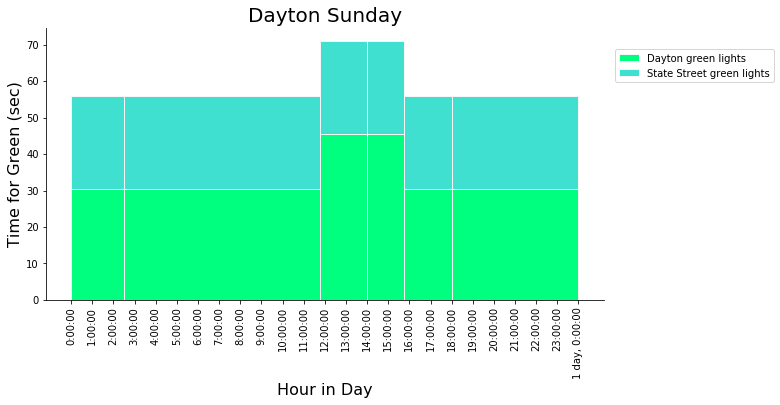

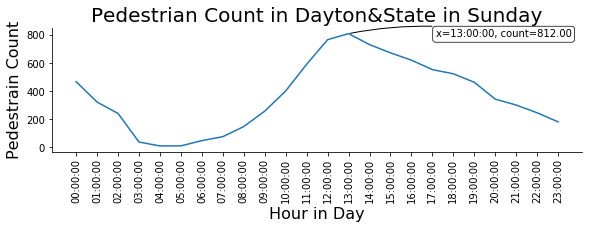

In [82]:
ped_sun = pedestrian[pedestrian['day_of_week'] == 'Sunday']

dayton_sun_total, dayton_sun_seconds, modify_Dayton_green_main_sun, modify_Dayton_green_cross_sun = \
    preprocess_ped_lights(ped_sun, "SS_22_State_St__North_Side", "SS_23_State_St__South_Side", Dayton_sun)

lights_ped(dayton_sun_seconds, modify_Dayton_green_main_sun, modify_Dayton_green_cross_sun, "Dayton Sunday",
           dayton_sun_total, "Pedestrian Count in Dayton&State in Sunday", 
          "Dayton green lights", "State Street green lights", -1, -1, False)

In [86]:
Johnson_wkd = Johnson[Johnson['Day Type'] == 'Monday - Thursday']
Johnson_fri = Johnson[Johnson['Day Type'] == 'Friday']
Johnson_sat = Johnson[Johnson['Day Type'] == 'Saturday']
Johnson_sun = Johnson[Johnson['Day Type'] == 'Sunday']
Johnson_wkd.head()

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
58,State and Johnson,Monday - Thursday,00:00:00,6,Johnson,State,54.0,80.0,57.0,1.0,...,4.5,7.0,45.5,23.0,3.0,3.5,16.5,6.5,9.0,7.5
59,State and Johnson,Monday - Thursday,03:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,State and Johnson,Monday - Thursday,05:00:00,6,Johnson,State,54.0,80.0,57.0,1.0,...,4.5,7.0,45.5,23.0,3.0,3.5,16.5,6.5,9.0,7.5
61,State and Johnson,Monday - Thursday,06:30:00,2,Johnson,State,40.0,90.0,67.0,1.0,...,4.5,7.0,55.5,23.0,3.0,3.5,16.5,6.5,9.0,7.5
62,State and Johnson,Monday - Thursday,07:00:00,3,Johnson,State,46.0,100.0,77.0,1.0,...,4.5,7.0,65.5,23.0,3.0,3.5,16.5,6.5,9.0,7.5


In [122]:
def lights_ped2(timeline, main_gree, cross_green, title1, ped_count, title2, 
              street1_lab="Main Street green lights", street2_lab="State Street green lights", 
               arw_x=0.17, arw_y=0.14, size=12, lw=1, flash=True):
    fig, ax = plt.subplots(figsize=(10,5))

    bar_start = 0
    for ix, (second, main_green, cross_green) in enumerate(zip(timeline, main_gree, cross_green)):
        width = second - bar_start
        ax.bar(bar_start, main_green, width=width, align='edge', color='springgreen', edgecolor='whitesmoke', 
               label=street1_lab if ix == 0 else "_nolegend_")
        ax.bar(bar_start, cross_green, width=width, bottom=main_green, 
               align='edge', color = 'turquoise', edgecolor='whitesmoke', label=street2_lab if ix == 0 else "_nolegend_")
        bar_start += width

    if flash:
        bbox_props = dict(boxstyle="darrow,pad=0.3",lw=1, facecolor="yellow", ec="black")
        txt = ax.text(arw_x, arw_y, "Flash", ha="center", va="center", rotation=0,
            size=size, bbox=bbox_props, transform = ax.transAxes)

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=90)
    ax.set_title(title1, fontsize=20)
    ax.set_xlabel("Hour in Day", fontsize=16)
    ax.set_ylabel("Time for Green (sec)", fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend(loc=[1.02, 0.8])
    plt.show()

    fig2 = plt.figure(figsize=(9.5, 5))
    ax2 = fig2.add_subplot(211)
    lines = ax2.plot(ped_count.index, ped_count.values)
    ax2.set_title(title2, fontsize=20)
    ax2.set_xticklabels(ped_count.index, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=16)
    ax2.set_ylabel("Pedestrain Count", fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    annot_max(ped_count.index, ped_count,ax2)

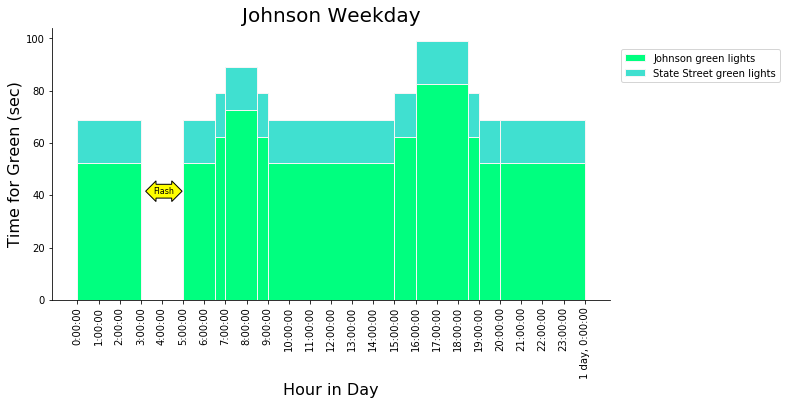

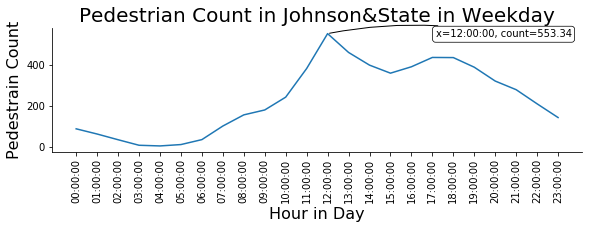

In [102]:
johnson_wkd_total, johnson_wkd_seconds, modify_johnson_green_main_wkd, modify_johnson_green_cross_wkd = \
    preprocess_ped_lights(ped_wkd, "F200_State_St____Goodman_s", "F200_State_St____Art_Center", Johnson_wkd)

lights_ped2(johnson_wkd_seconds, modify_johnson_green_main_wkd, modify_johnson_green_cross_wkd, "Johnson Weekday",
           johnson_wkd_total, "Pedestrian Count in Johnson&State in Weekday", 
          "Johnson green lights", "State Street green lights", 0.2, 0.4, size=8)

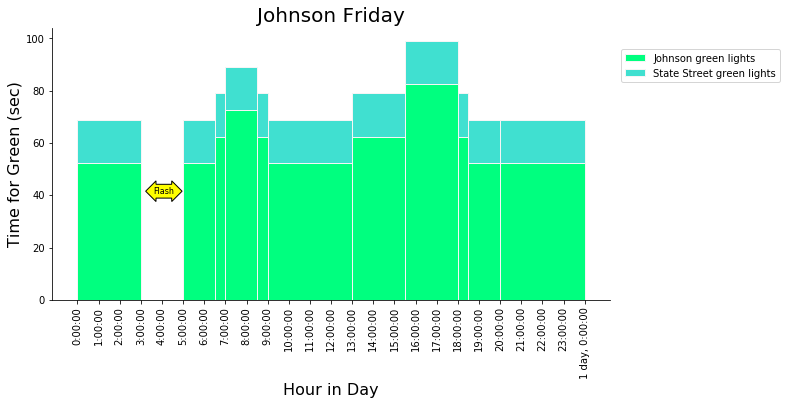

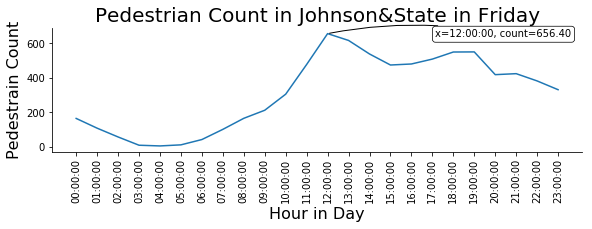

In [108]:
johnson_fri_total, johnson_fri_seconds, modify_johnson_green_main_fri, modify_johnson_green_cross_fri = \
    preprocess_ped_lights(ped_fri, "F200_State_St____Goodman_s", "F200_State_St____Art_Center", Johnson_fri)

lights_ped2(johnson_fri_seconds, modify_johnson_green_main_fri, modify_johnson_green_cross_fri, "Johnson Friday",
           johnson_fri_total, "Pedestrian Count in Johnson&State in Friday", 
          "Johnson green lights", "State Street green lights", 0.2, 0.4, 8)

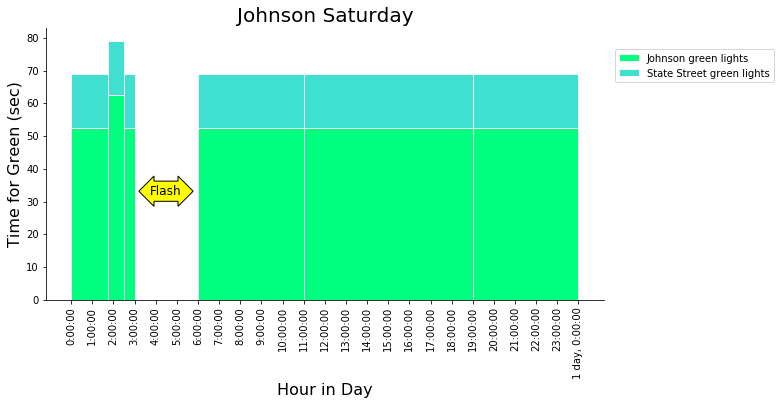

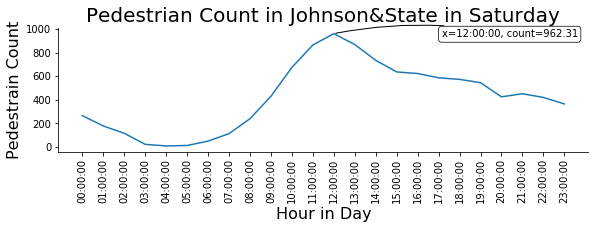

In [115]:
johnson_sat_total, johnson_sat_seconds, modify_johnson_green_main_sat, modify_johnson_green_cross_sat = \
    preprocess_ped_lights(ped_sat, "F200_State_St____Goodman_s", "F200_State_St____Art_Center", Johnson_sat)

lights_ped2(johnson_sat_seconds, modify_johnson_green_main_sat, modify_johnson_green_cross_sat, "Johnson Saturday",
           johnson_sat_total, "Pedestrian Count in Johnson&State in Saturday", 
          "Johnson green lights", "State Street green lights", 0.215, 0.4, 12)

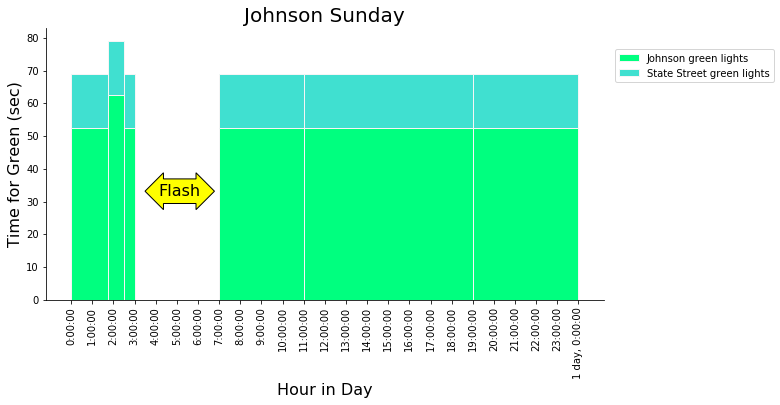

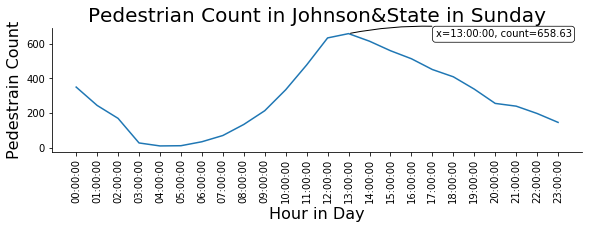

In [130]:
johnson_sun_total, johnson_sun_seconds, modify_johnson_green_main_sun, modify_johnson_green_cross_sun = \
    preprocess_ped_lights(ped_sun, "F200_State_St____Goodman_s", "F200_State_St____Art_Center", Johnson_sun)

lights_ped2(johnson_sun_seconds, modify_johnson_green_main_sun, modify_johnson_green_cross_sun, "Johnson Sunday",
           johnson_sun_total, "Pedestrian Count in Johnson&State in Sunday", 
          "Johnson green lights", "State Street green lights", 0.24, 0.4, 16)

In [134]:
Gorham_wkd = Gorham[Gorham['Day Type'] == 'Monday - Thursday']
Gorham_fri = Gorham[Gorham['Day Type'] == 'Friday']
Gorham_sat = Gorham[Gorham['Day Type'] == 'Saturday']
Gorham_sun = Gorham[Gorham['Day Type'] == 'Sunday']
Gorham_wkd.head()

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
24,State and Gorham,Monday - Thursday,00:30:00,6,Gorham,State,29.0,80.0,53.0,1.5,...,5.0,9.0,39.0,27.0,2.5,3.0,21.5,5.5,11.0,10.5
25,State and Gorham,Monday - Thursday,03:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,State and Gorham,Monday - Thursday,05:00:00,6,Gorham,State,29.0,80.0,53.0,1.5,...,5.0,9.0,39.0,27.0,2.5,3.0,21.5,5.5,11.0,10.5
27,State and Gorham,Monday - Thursday,06:30:00,2,Gorham,State,15.0,90.0,63.0,1.5,...,5.0,9.0,49.0,27.0,2.5,3.0,21.5,5.5,11.0,10.5
28,State and Gorham,Monday - Thursday,07:00:00,3,Gorham,State,8.0,100.0,73.0,1.5,...,5.0,9.0,59.0,27.0,2.5,3.0,21.5,5.5,11.0,10.5


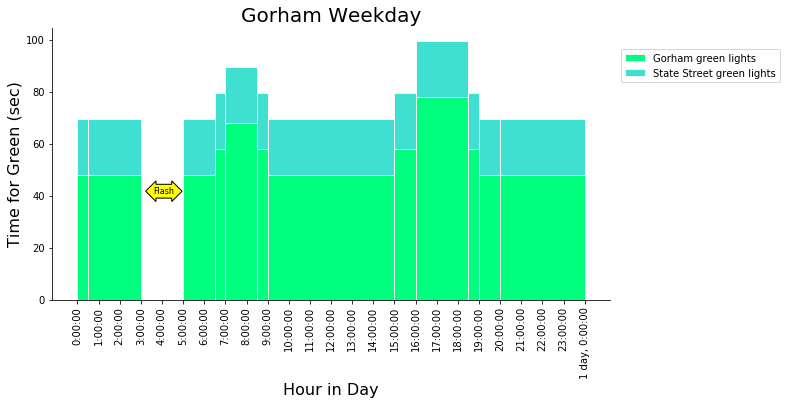

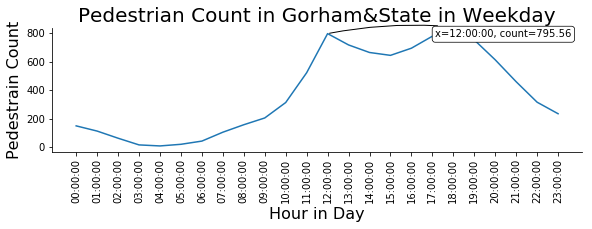

In [135]:
gorham_wkd_total, gorham_wkd_seconds, modify_gorham_green_main_wkd, modify_gorham_green_cross_wkd = \
    preprocess_ped_lights(ped_wkd, "F341_State_St_", "F344_State_St_", Gorham_wkd)

lights_ped2(gorham_wkd_seconds, modify_gorham_green_main_wkd, modify_gorham_green_cross_wkd, "Gorham Weekday",
           gorham_wkd_total, "Pedestrian Count in Gorham&State in Weekday", 
          "Gorham green lights", "State Street green lights", 0.2, 0.4, size=8)

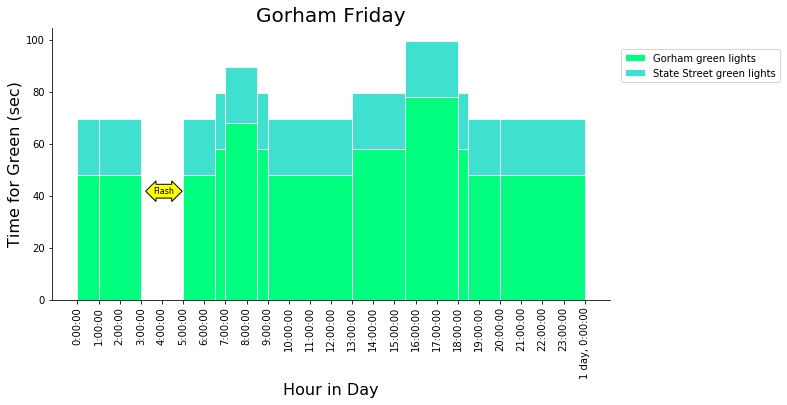

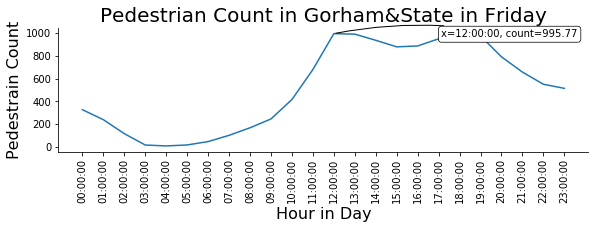

In [136]:
gorham_fri_total, gorham_fri_seconds, modify_gorham_green_main_fri, modify_gorham_green_cross_fri = \
    preprocess_ped_lights(ped_fri, "F341_State_St_", "F344_State_St_", Gorham_fri)

lights_ped2(gorham_fri_seconds, modify_gorham_green_main_fri, modify_gorham_green_cross_fri, "Gorham Friday",
           gorham_fri_total, "Pedestrian Count in Gorham&State in Friday", 
          "Gorham green lights", "State Street green lights", 0.2, 0.4, size=8)

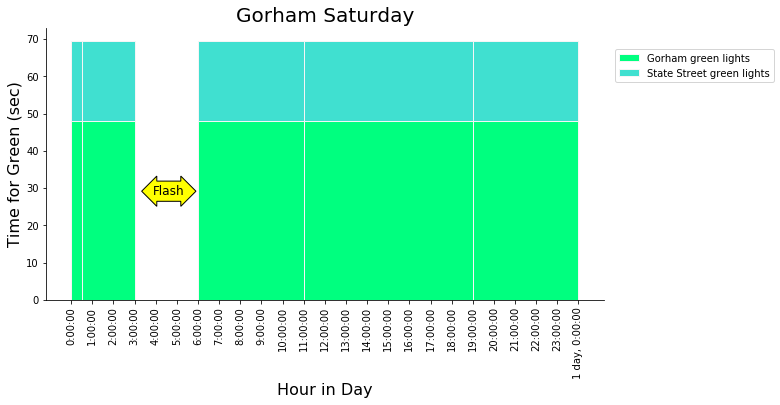

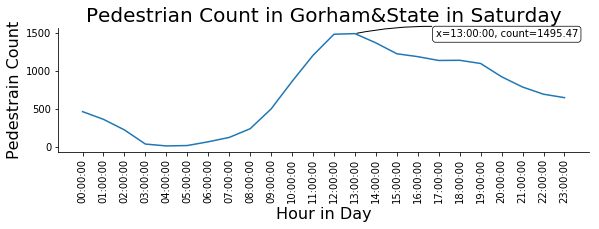

In [139]:
gorham_sat_total, gorham_sat_seconds, modify_gorham_green_main_sat, modify_gorham_green_cross_sat = \
    preprocess_ped_lights(ped_sat, "F341_State_St_", "F344_State_St_", Gorham_sat)

lights_ped2(gorham_sat_seconds, modify_gorham_green_main_sat, modify_gorham_green_cross_sat, "Gorham Saturday",
           gorham_sat_total, "Pedestrian Count in Gorham&State in Saturday", 
          "Gorham green lights", "State Street green lights", 0.22, 0.4, size=12)

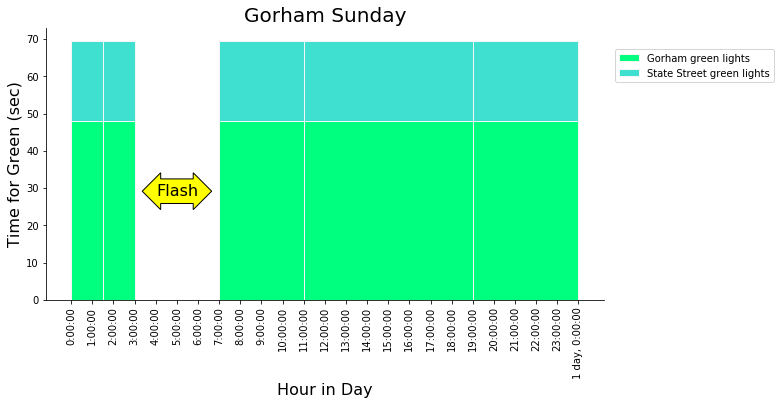

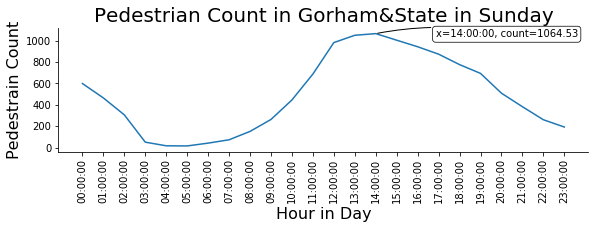

In [145]:
gorham_sun_total, gorham_sun_seconds, modify_gorham_green_main_sun, modify_gorham_green_cross_sun = \
    preprocess_ped_lights(ped_sun, "F341_State_St_", "F344_State_St_", Gorham_sun)

lights_ped2(gorham_sun_seconds, modify_gorham_green_main_sun, modify_gorham_green_cross_sun, "Gorham Sunday",
           gorham_sun_total, "Pedestrian Count in Gorham&State in Sunday", 
          "Gorham green lights", "State Street green lights", 0.235, 0.4, size=16)

1. We can consider adopting the same traffic lights pattern on Saturday and Sunday. 

The Pedestrian Count have only one peak around 12 pm - 1 pm on both Saturday and Sunday. However, there are two peaks, one around 12 pm and the other around 6 pm, from Monday to Friday. It can be explained by the commuting. 

2. More people walk at noon and on Saturday. (an intuitive conclusion)

We can easily see the trends from the plots. The number of people who walk on Saturday is almost as twice large as the number who walk on weekday (From Monday to Thursday). The number for Friday and Sunday are only 1/3 larger than the number on weekday. 

3. Trends do not align with the traffic lights. 

Traffic lights may favor cars instead of pedestrian. Need cars data. Need further investigation. 

## Green Lights Cycle

In [33]:
import plotly.figure_factory as ff

In [34]:
Dayton_weekday

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
2,State and Dayton,Monday - Thursday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
3,State and Dayton,Monday - Thursday,09:10:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
4,State and Dayton,Monday - Thursday,15:30:00,5,Dayton/Fairchild,State,21.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
5,State and Dayton,Monday - Thursday,18:00:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
6,State and Dayton,Monday - Thursday,19:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5


In [35]:
Dayton_wkd_cycle = Dayton_weekday[['Start Time', 'Pattern', 'Total Cycle Time (s)',
                                   'Main Street Red (s)', 'Main Street Yellow (s)', 'Main Street Green (s)', 'Main Street Total Cycle Time (s)',
                                   'Cross Street Red (s)', 'Cross Street Yellow (s)', 'Cross Street Green (s)', 'Cross Street Total Cycle Time (s)']]
Dayton_wkd_cycle

,Start Time,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
0,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06:00:00,6,65.0,1.5,3.0,30.5,35.0,1.5,3.0,25.5,30.0
2,07:00:00,3,80.0,1.5,3.0,45.5,50.0,1.5,3.0,25.5,30.0
3,09:10:00,1,65.0,1.5,3.0,30.5,35.0,1.5,3.0,25.5,30.0
4,15:30:00,5,80.0,1.5,3.0,45.5,50.0,1.5,3.0,25.5,30.0
5,18:00:00,1,65.0,1.5,3.0,30.5,35.0,1.5,3.0,25.5,30.0
6,19:00:00,6,65.0,1.5,3.0,30.5,35.0,1.5,3.0,25.5,30.0


In [36]:
Dayton_wkd_cycle['Main Street Red (s)'] +=  Dayton_wkd_cycle['Cross Street Total Cycle Time (s)']
Dayton_wkd_cycle['Cross Street Red (s)'] += Dayton_wkd_cycle['Main Street Total Cycle Time (s)']
Dayton_wkd_cycle

,Start Time,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
0,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06:00:00,6,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0
2,07:00:00,3,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0
3,09:10:00,1,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0
4,15:30:00,5,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0
5,18:00:00,1,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0
6,19:00:00,6,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0


In [37]:
Dayton_wkd_cycle_p1 = Dayton_wkd_cycle[Dayton_wkd_cycle['Pattern'] == 1]
Dayton_wkd_cycle_p1[:1]

,Start Time,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
3,09:10:00,1,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0


In [38]:
Dayton_wkd_cycle_p1

,Start Time,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
3,09:10:00,1,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0
5,18:00:00,1,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0


In [39]:
df1 = Dayton_wkd_cycle_p1[:1]
df1

,Start Time,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
3,09:10:00,1,65.0,31.5,3.0,30.5,35.0,36.5,3.0,25.5,30.0


In [40]:
Dayton_wkd_cycle_p3 = Dayton_wkd_cycle[Dayton_wkd_cycle['Pattern'] == 3]
Dayton_wkd_cycle_p3[:1]

,Start Time,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
2,07:00:00,3,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0


In [41]:
df3 = Dayton_wkd_cycle_p3[:1]
df3

,Start Time,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
2,07:00:00,3,80.0,31.5,3.0,45.5,50.0,51.5,3.0,25.5,30.0


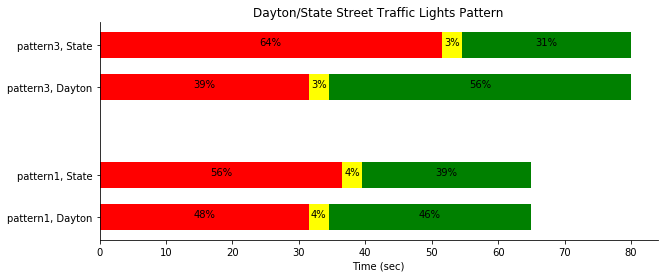

In [43]:
# plt.rcParams['figure.figsize'] = (4,4)
lightPattern = ('pattern1, Dayton', 'pattern1, State', 'pattern3, Dayton', 'pattern3, State')
segments = 3

# generate some multi-dimensional data & arbitrary labels
data = np.array([[float(df1["Main Street Red (s)"]), float(df1['Cross Street Red (s)']), 
                  float(df3["Main Street Red (s)"]), float(df3['Cross Street Red (s)'])], 
                 [float(df1["Main Street Yellow (s)"]), float(df1['Cross Street Yellow (s)']), 
                  float(df3["Main Street Yellow (s)"]), float(df3['Cross Street Yellow (s)'])],
                [float(df1["Main Street Green (s)"]), float(df1['Cross Street Green (s)']), 
                 float(df3["Main Street Green (s)"]), float(df3['Cross Street Green (s)'])]])
percentages = np.array([
                        [float(df1["Main Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Green (s)"]/df1['Total Cycle Time (s)'])*100], 
                        [float(df1["Cross Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Green (s)"]/df1['Total Cycle Time (s)'])*100],
                       [float(df3["Main Street Red (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Main Street Yellow (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Main Street Green (s)"]/df3['Total Cycle Time (s)'])*100], 
                        [float(df3["Cross Street Red (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Cross Street Yellow (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Cross Street Green (s)"]/df3['Total Cycle Time (s)'])*100]
                       ])
y_pos = [0, 0.08, 0.25, 0.33]

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

colors1 =['red', 'yellow', 'green']
patch_handles = []
left = np.zeros(len(lightPattern)) # left alignment of data starts at zero
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y=y_pos, width=d, height=0.05, left=left, color=colors1[i], align='center'))
    # accumulate the left-hand offsets
    left += d

# go through all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%d%%" % (percentages[i,j]), ha='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(lightPattern)
ax.set_xlabel('Time (sec)')
ax.set_title("Dayton/State Street Traffic Lights Pattern")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [84]:
def constructArr(pat_name, df1, df2=None, df3=None, df4=None):
    length = len(pat_name)/2
    assert length <= 4
    if length == 2:
        assert (df2 is not None)&(df3 is None)&(df4 is None)
    elif length == 3:
        assert (df2 is not None)&(df3 is None)&(df4 is None)
    else:
        assert (df2 is not None)&(df3 is not None)&(df4 is not None)  
    
    if length == 2:
        data = np.array([[float(df1["Main Street Red (s)"]), float(df1['Cross Street Red (s)']), 
                  float(df2["Main Street Red (s)"]), float(df2['Cross Street Red (s)'])], 
                 [float(df1["Main Street Yellow (s)"]), float(df1['Cross Street Yellow (s)']), 
                  float(df2["Main Street Yellow (s)"]), float(df2['Cross Street Yellow (s)'])],
                [float(df1["Main Street Green (s)"]), float(df1['Cross Street Green (s)']), 
                 float(df2["Main Street Green (s)"]), float(df2['Cross Street Green (s)'])]])
        
        percentages = np.array([
                        [float(df1["Main Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Green (s)"]/df1['Total Cycle Time (s)'])*100], 
                        [float(df1["Cross Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Green (s)"]/df1['Total Cycle Time (s)'])*100],
                       [float(df2["Main Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Green (s)"]/df2['Total Cycle Time (s)'])*100], 
                        [float(df2["Cross Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Green (s)"]/df2['Total Cycle Time (s)'])*100]
                       ])
        y_pos = [0, 0.08, 0.25, 0.33]
    elif length == 4:
        data = np.array([[float(df1["Main Street Red (s)"]), float(df1['Cross Street Red (s)']), 
                  float(df2["Main Street Red (s)"]), float(df2['Cross Street Red (s)']), 
                    float(df3["Main Street Red (s)"]), float(df3['Cross Street Red (s)']), 
                  float(df4["Main Street Red (s)"]), float(df4['Cross Street Red (s)'])], 
                 [float(df1["Main Street Yellow (s)"]), float(df1['Cross Street Yellow (s)']), 
                  float(df2["Main Street Yellow (s)"]), float(df2['Cross Street Yellow (s)']),
                 float(df3["Main Street Yellow (s)"]), float(df3['Cross Street Yellow (s)']), 
                  float(df4["Main Street Yellow (s)"]), float(df4['Cross Street Yellow (s)'])],
                [float(df1["Main Street Green (s)"]), float(df1['Cross Street Green (s)']), 
                 float(df2["Main Street Green (s)"]), float(df2['Cross Street Green (s)']),
                float(df3["Main Street Green (s)"]), float(df3['Cross Street Green (s)']), 
                 float(df4["Main Street Green (s)"]), float(df4['Cross Street Green (s)'])]])
        
        percentages = np.array([
                        [float(df1["Main Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Green (s)"]/df1['Total Cycle Time (s)'])*100], 
                        [float(df1["Cross Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Green (s)"]/df1['Total Cycle Time (s)'])*100],
                       [float(df2["Main Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Green (s)"]/df2['Total Cycle Time (s)'])*100], 
                        [float(df2["Cross Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Green (s)"]/df2['Total Cycle Time (s)'])*100], 
                        [float(df3["Main Street Red (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Main Street Yellow (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Main Street Green (s)"]/df3['Total Cycle Time (s)'])*100], 
                        [float(df3["Cross Street Red (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Cross Street Yellow (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Cross Street Green (s)"]/df3['Total Cycle Time (s)'])*100],
                       [float(df4["Main Street Red (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Main Street Yellow (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Main Street Green (s)"]/df4['Total Cycle Time (s)'])*100], 
                        [float(df4["Cross Street Red (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Cross Street Yellow (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Cross Street Green (s)"]/df4['Total Cycle Time (s)'])*100]
                       ])
        y_pos = [0, 0.08, 0.25, 0.33, 0.5, 0.58, 0.75, 0.83]
        
    return data, percentages, y_pos

In [92]:
def visPattern(pat_name, data, percentages, xlab, title, y_pos, figsize):
    segments = 3
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    colors1 =['red', 'yellow', 'green']
    patch_handles = []
    left = np.zeros(len(pat_name)) # left alignment of data starts at zero

    for i, d in enumerate(data):
        patch_handles.append(ax.barh(y=y_pos, width=d, height=0.05, left=left, color=colors1[i], align='center'))
        # accumulate the left-hand offsets
        left += d

    # go through all of the bar segments and annotate
    for j in range(len(patch_handles)):
        for i, patch in enumerate(patch_handles[j].get_children()):
            bl = patch.get_xy()
            x = 0.5*patch.get_width() + bl[0]
            y = 0.5*patch.get_height() + bl[1]
            ax.text(x,y, "%d%%" % (percentages[i,j]), ha='center')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(pat_name)
    ax.set_xlabel(xlab)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

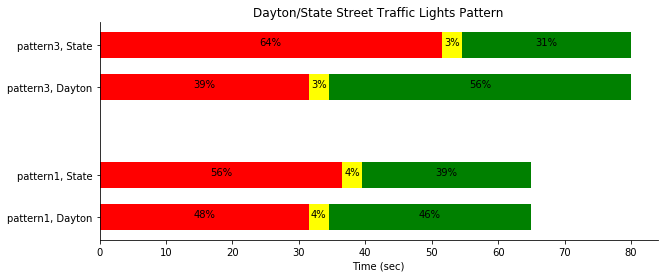

In [93]:
Dayton_pat = ('pattern1, Dayton', 'pattern1, State', 'pattern3, Dayton', 'pattern3, State')
dayton_data, dayton_pctg, dayton_y = constructArr(Dayton_pat, Dayton_wkd_cycle_p1[:1], Dayton_wkd_cycle_p3[:1])
visPattern(Dayton_pat, dayton_data, dayton_pctg, 'Time (sec)', 
           "Dayton/State Street Traffic Lights Pattern", dayton_y, (10,4) )

In [63]:
pattern_list = ['Pattern', 'Total Cycle Time (s)',
                'Main Street Red (s)', 'Main Street Yellow (s)', 'Main Street Green (s)', 'Main Street Total Cycle Time (s)',
                'Cross Street Red (s)', 'Cross Street Yellow (s)', 'Cross Street Green (s)', 'Cross Street Total Cycle Time (s)']

In [64]:
Gorham_cycle = patterns[patterns['Intersection'] == 'State and Gorham']
Gorham_cycle = Gorham_cycle[pattern_list]
Gorham_cycle

,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
4,1,80,1.5,3.5,48.0,53,2.5,3.0,21.5,27
5,2,90,1.5,3.5,58.0,63,2.5,3.0,21.5,27
6,3,100,1.5,3.5,68.0,73,2.5,3.0,21.5,27
7,4,90,1.5,3.5,58.0,63,2.5,3.0,21.5,27
8,5,110,1.5,3.5,78.0,83,2.5,3.0,21.5,27
9,6,80,1.5,3.5,48.0,53,2.5,3.0,21.5,27


In [69]:
Gorham_cycle['Main Street Red (s)'] +=  Gorham_cycle['Cross Street Total Cycle Time (s)']
Gorham_cycle['Cross Street Red (s)'] += Gorham_cycle['Main Street Total Cycle Time (s)']
Gorham_cycle.head()

,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
4,1,80,28.5,3.5,48.0,53,55.5,3.0,21.5,27
5,2,90,28.5,3.5,58.0,63,65.5,3.0,21.5,27
6,3,100,28.5,3.5,68.0,73,75.5,3.0,21.5,27
7,4,90,28.5,3.5,58.0,63,65.5,3.0,21.5,27
8,5,110,28.5,3.5,78.0,83,85.5,3.0,21.5,27


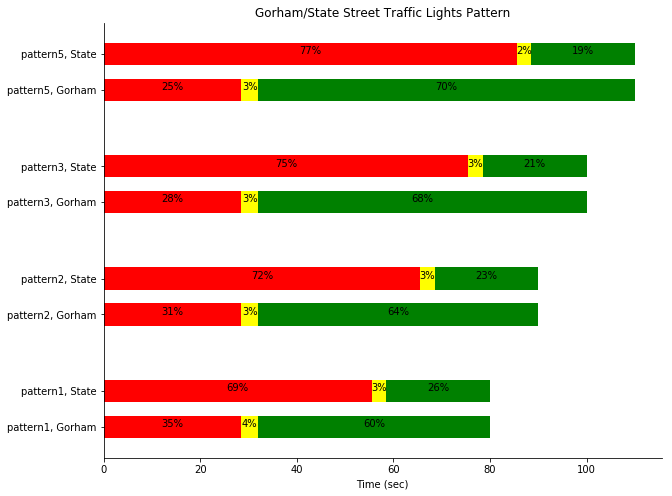

In [94]:
Gorham_pat = ('pattern1, Gorham', 'pattern1, State', 
              'pattern2, Gorham', 'pattern2, State', 
              'pattern3, Gorham', 'pattern3, State', 
              'pattern5, Gorham', 'pattern5, State')
gorham_data, gorham_pctg, gorham_y = constructArr(Gorham_pat, Gorham_cycle[Gorham_cycle['Pattern'] == 1], 
                                                 Gorham_cycle[Gorham_cycle['Pattern'] == 2], 
                                                  Gorham_cycle[Gorham_cycle['Pattern'] == 3], 
                                                 Gorham_cycle[Gorham_cycle['Pattern'] == 5])
visPattern(Gorham_pat, gorham_data, gorham_pctg, 'Time (sec)', 
           "Gorham/State Street Traffic Lights Pattern", gorham_y, (10, 8) )

In [95]:
Johnson_cycle = patterns[patterns['Intersection'] == 'State and Johnson']
Johnson_cycle = Johnson_cycle[pattern_list]
Johnson_cycle['Main Street Red (s)'] +=  Johnson_cycle['Cross Street Total Cycle Time (s)']
Johnson_cycle['Cross Street Red (s)'] += Johnson_cycle['Main Street Total Cycle Time (s)']
Johnson_cycle.head()

,Pattern,Total Cycle Time (s),Main Street Red (s),Main Street Yellow (s),Main Street Green (s),Main Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Total Cycle Time (s)
10,1,80,24.0,3.5,52.5,57,60.0,3.5,16.5,23
11,2,90,24.0,3.5,62.5,67,70.0,3.5,16.5,23
12,3,100,24.0,3.5,72.5,77,80.0,3.5,16.5,23
13,4,90,24.0,3.5,62.5,67,70.0,3.5,16.5,23
14,5,110,24.0,3.5,82.5,87,90.0,3.5,16.5,23


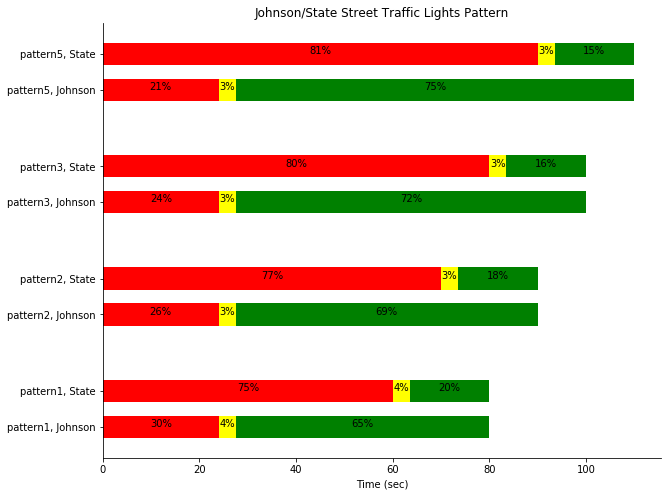

In [97]:
Johnson_pat = ('pattern1, Johnson', 'pattern1, State', 
              'pattern2, Johnson', 'pattern2, State', 
              'pattern3, Johnson', 'pattern3, State', 
              'pattern5, Johnson', 'pattern5, State')
johnson_data, johnson_pctg, johnson_y = constructArr(Johnson_pat, Johnson_cycle[Johnson_cycle['Pattern'] == 1], 
                                                 Johnson_cycle[Johnson_cycle['Pattern'] == 2], 
                                                  Johnson_cycle[Johnson_cycle['Pattern'] == 3], 
                                                 Johnson_cycle[Johnson_cycle['Pattern'] == 5])
visPattern(Johnson_pat, johnson_data, johnson_pctg, 'Time (sec)', 
           "Johnson/State Street Traffic Lights Pattern", johnson_y, (10, 8) )

For pedestrian to go across State Street (when main street light is green), they do not have to wait for a long time, because the green lights have a relatively large occupation. 
However, for pedestrian to go across Main Street (Dayton, Gorham, or Johnson), they have to wait for a long time. The time they wait is about three to even four times than the other way around. 